# Back Propagation

## 1. loading of data

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive3 = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1xJ7GI9gcVJ5Ctrx6DS6eZGov32eidZiM'
fluff, id = link.split('=')
downloaded = drive3.CreateFile({'id':id}) 
downloaded.GetContentFile('data.pkl') 


In [0]:
def sigmoid_func(x):
  return 1/(1 + np.exp(-x)) 

### Task 1: Implementing backpropagation and Gradient checking

In [0]:
import math
import numpy as np 
def forward_propagation(X, y, W):
  Y_pred=[]
  we_grad=[]
  we=[]
  f1=W[0]*X[0]
  f2=W[1]*X[1]
  f3=W[2]*X[2]
  f4=W[3]*X[3]
  f5=W[4]*X[4]
  exp=np.exp(((f1+f2)**2)+W[5])
  tan=math.tanh(exp+W[6])
  sin=math.sin(f3)
  sigmoid=sigmoid_func((sin*(f4+f5))+W[7])
  y_op=(tan+(sigmoid*W[8]))
  #print(y_op)  
  Loss=(y-y_op)**2
  return(Loss)

In [0]:
import math
import numpy as np 
def backward_propagation(X, y, W):
  Y_pred=[]
  we=[]
  f1=W[0]*X[0]
  f2=W[1]*X[1]
  f3=W[2]*X[2]
  f4=W[3]*X[3]
  f5=W[4]*X[4]
  exp=np.exp(((f1+f2)**2)+W[5])
  tan=math.tanh(exp+W[6])
  sin=math.sin(f3)
  sigmoid=sigmoid_func((sin*(f4+f5))+W[7])
  y_op=(tan+(sigmoid*W[8]))
  Y_pred.append(y_op)
  w0=2*X[0]*(f1+f2)*np.exp((f1+f2)**2+W[5])*(1-(np.tanh(np.exp((f1+f2)**2+W[5])+W[6])**2))
  w1=2*X[1]*(f1+f2)*np.exp((f1+f2)**2+W[5])*(1-(np.tanh(np.exp((f1+f2)**2+W[5])+W[6])**2))

  w2=((f5+f4)*W[8]*X[2]*np.exp((f5+f4)*math.sin(f3)+W[7])*(math.cos(f3)))/((np.exp((f5+f4)*math.sin(f3)+W[7])+1)**2)

  w3=(W[8]*math.sin(f3)*X[3]*np.exp((f5+f4)*math.sin(f3)+W[7]))/((np.exp((f5+f4)*math.sin(f3)+W[7])+1)**2)


  w4=(W[8]*math.sin(f3)*X[4]*np.exp((f5+f4)*math.sin(f3)+W[7]))/((np.exp((f5+f4)*math.sin(f3)+W[7])+1)**2)

  w5=np.exp((f1+f2)**2+W[5])*(1-(np.tanh(np.exp((f1+f2)**2+W[5])+W[6])**2))
  w6=1-(np.tanh(np.exp((f1+f2)**2+W[5])+W[6])**2)

  w7=W[8]*np.exp(W[7]+math.sin(f3)*(f5+f4))/(np.exp(W[7]+(math.sin(f3)*(f5+f4)))+1)**2

  w8=1/(np.exp(-math.sin(f3)*(f4+f5)-W[7])+1)

  we.append(w0)
  we.append(w1)
  we.append(w2)
  we.append(w3)
  we.append(w4)
  we.append(w5)
  we.append(w6)
  we.append(w7)
  we.append(w8)
    
  return(we)

In [0]:
import math
import numpy as np 
def gradient_checking(X, y, W,we_grad):
  Y_pred=[]
  we_grad_check=[]
  f1=W[0]*X[0]
  f2=W[1]*X[1]
  f3=W[2]*X[2]
  f4=W[3]*X[3]
  f5=W[4]*X[4]
  exp=np.exp(((f1+f2)**2)+W[5])
  tan=math.tanh(exp+W[6])
  sin=math.sin(f3)
  sigmoid=sigmoid_func((sin*(f4+f5))+W[7])
  y_op=(tan+(sigmoid*W[8]))
  

  w0= (((math.tanh((np.exp(((((W[0]+0.0001)*X[0])+f2)**2)+W[5]))+W[6]))+(sigmoid*W[8]))  -((math.tanh((np.exp(((((W[0]-0.0001)*X[0])+f2)**2)+W[5]))+W[6]))+(sigmoid*W[8])))/(2*0.0001)

  w1=(((math.tanh((np.exp((((f1+((W[1]+0.0001))*X[1]))**2)+W[5]))+W[6]))+(sigmoid*W[8]))-((math.tanh((np.exp((((f1+((W[1]-0.0001))*X[1]))**2)+W[5]))+W[6]))+(sigmoid*W[8])))/(2*0.0001)

  w2=((tan+((sigmoid_func(math.sin((W[2]+0.0001)*X[2])*(f4+f5)+W[7]))*W[8]))-(tan+((sigmoid_func(math.sin((W[2]-0.0001)*X[2])*(f4+f5)+W[7]))*W[8])))/(2*0.0001)

  w3=((tan+((sigmoid_func(((math.sin(f3)*(((W[3]+0.0001)*X[3])+f5))+W[7]))*W[8])))-(tan+((sigmoid_func(((math.sin(f3)*(((W[3]-0.0001)*X[3])+f5))+W[7]))*W[8]))))/(2*0.0001)

  w4=((tan+((sigmoid_func(((math.sin(f3)*((f4)+((W[4]+0.0001)*X[4])))+W[7]))*W[8])))-(tan+((sigmoid_func(((math.sin(f3)*((f4)+((W[4]-0.0001)*X[4])))+W[7]))*W[8]))))/(2*0.0001)

  w5=((math.tanh((np.exp(((((f1)+f2)**2)+W[5]+0.0001))+(W[6])))+(sigmoid*W[8]))-(math.tanh((np.exp(((((f1)+f2)**2)+W[5]-0.0001))+(W[6])))+(sigmoid*W[8])))/(2*0.0001)

  w6=(((math.tanh(exp+(W[6]+0.0001)))+(sigmoid*W[8]))-((math.tanh(exp+(W[6]-0.0001)))+(sigmoid*W[8])))/(2*0.0001)

  w7=((tan+((sigmoid_func((sin*(f4+f5))+(W[7]+0.0001)))*W[8]))-(tan+((sigmoid_func((sin*(f4+f5))+(W[7]-0.0001)))*W[8])))/(2*0.0001)
  w8=((tan+(sigmoid*(W[8]+0.0001)))-(tan+(sigmoid*(W[8]-0.0001))))/(2*0.0001)
  we_grad_check.append(w0)
  we_grad_check.append(w1)
  we_grad_check.append(w2)
  we_grad_check.append(w3)
  we_grad_check.append(w4)
  we_grad_check.append(w5)
  we_grad_check.append(w6)
  we_grad_check.append(w7)
  we_grad_check.append(w8)
  
  res=[]
  for i in range(len(we_grad)):
    
    res.append((we_grad[i]-we_grad_check[i])/(we_grad[i]+we_grad_check[i]))
    
  return(res)





In [10]:
import pickle
import numpy as np
import mpmath
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

X = data[:, :5]                                                   
y = data[:, -1]
Loss=[]
Final_gradients=[]
gradients_check=[]

W=[]
for i in range(9):
  W.append(np.random.uniform(0,1))
for i in range(506):
  #print(y[i])
  Loss.append(forward_propagation(X[i], y[i], W))
  gradients=(backward_propagation(X[i], y[i], W))
  gradients_check.append(gradient_checking(X[i], y[i], W,gradients))
  Final_gradients.append(gradients)
#print("Loss",Loss)
#print("gradients",Final_gradients)
print("gradients_check",gradients_check)

  

gradients_check [[3.324970230527332e-08, -2.9699584285577992e-09, 1.1631987012115399e-09, 5.211383184138218e-11, 2.440737098145427e-12, -1.0015759920451117e-08, -3.295182983885201e-09, 2.690745281859375e-10, -7.518599628224964e-14], [8.54331113937879e-09, 5.796495220362223e-10, 1.0180309055908652e-10, 2.221470995553361e-11, 5.320829861664147e-12, -1.0019685647450525e-08, -3.29114031279624e-09, 3.34061653847921e-10, -3.227933195201412e-13], [6.712285824793773e-09, -3.0614268324749608e-09, 1.0859641692380914e-10, 6.139735879584424e-12, 5.320829861664147e-12, -1.0011065549414493e-08, -3.2461876843277465e-09, 3.3889209758054505e-10, 5.622994129183636e-13], [3.5822131327454335e-08, 1.3710208571729367e-08, 2.6782292028700103e-11, -3.7088496073372306e-11, 4.4878172898060125e-11, -1.0051793550449104e-08, -3.2799843336048508e-09, 3.957448790386167e-10, -4.67336291677137e-13], [3.5969628934703e-08, 5.443205774775985e-09, 1.1508073533387945e-11, -5.957441747668296e-13, -3.446939669718923e-12, -1.

### Task 2: Optimizers

1. As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
2. check this video and blog: https://www.youtube.com/watch?v=gYpoJMlgyXA,  http://cs231n.github.io/neural-networks-3/
3. use the same computational graph that was mentioned above to do this task
4. initilze the 9 weights from normal distribution with mean=0 and std=0.01

5. 

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

6.

<pre>
<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights
<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights
<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights
</pre>



<b>task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights


In [0]:
import math
import numpy as np 
def forward_propagation_1(X, y, W):
  Y_pred=[]
  we_grad=[]
  we=[]
  f1=W[0]*X[0]
  f2=W[1]*X[1]
  f3=W[2]*X[2]
  f4=W[3]*X[3]
  f5=W[4]*X[4]
  exp=np.exp(((f1+f2)**2)+W[5])
  tan=math.tanh(exp+W[6])
  sin=math.sin(f3)
  sigmoid=sigmoid_func((sin*(f4+f5))+W[7])
  y_op=(tan+(sigmoid*W[8]))  
  Loss=(y-y_op)**2
  return(y_op)

In [0]:
def Vanilla_update(old_weights,gradients):
  new_weight=[]
  for i in range(len(old_weights)):
     d=old_weights[i]+(0.1*gradients[i])  
     new_weight.append(d) 
  return(new_weight)




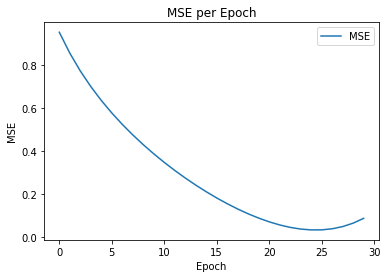

In [13]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

X = data[:, :5]                                                   
y = data[:, -1]
W=[]
for i in range(506):
  d=[]
  for j in range(9):
    d.append(np.random.normal(0, 0.01))
  W.append(d)
mse_all=[]




for j in range(30):
  new_W=[]
  y_pred_all=[]
  
  #print(y_true)
  #print("W",W)
  for i in range(506):
    
    gradients=(backward_propagation(X[i], y[i], W[i]))

    new_W_1=(Vanilla_update(W[i],gradients))
    
    new_W.append(Vanilla_update(W[i],gradients))
    
    y_pred_all.append(forward_propagation_1(X[i], y[i], new_W_1))
  #print("new_W_1",new_W)
  W=new_W
  y_pred=y_pred_all
  
  #print(y_pred)
  mse_all.append(mean_squared_error(y, y_pred_all))
  
  
import matplotlib.pyplot as plt 
Y=[] 
for i in range(30):
    Y.append(i)

plt.plot(Y,mse_all,label='MSE')
plt.legend()
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
plt.title('MSE per Epoch') 
plt.show()

<b>task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights

In [0]:
def momentum_update(old_weights,old_velocity,gradients):
  new_weight=[]
  new_velocity=[]
  
  for i in range(len(old_weights)):
     b=(0.9*old_velocity[i])+(0.1*gradients[i]) 
     u=old_weights[i]+b
     new_velocity.append(b)  
     new_weight.append(u) 
  return(new_weight,new_velocity)




In [0]:
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
mse_all=[]
X = data[:, :5]                                                   
y = data[:, -1]
W=[]
V=[]
for i in range(506):
  d=[]
  f=[]
  for j in range(9):
    d.append(np.random.normal(0, 0.01))
    f.append(np.random.normal(0, 0.01))
  W.append(d)
  V.append(f)

for j in range(40):
  new_W=[]
  new_V=[]
  y_pred_all=[]
 
  for i in range(506):
    gradients=(backward_propagation(X[i], y[i], W[i]))
    
    new_W1,new_V1=momentum_update(W[i],V[i],gradients)
    new_W.append(new_W1)
    new_V.append(new_V1)
    y_pred_all.append(forward_propagation_1(X[i], y[i], new_W1))

  W=new_W
  V=new_V
  y_pred=y_pred_all
  
  #print(y_pred)
  mse_all.append(mean_squared_error(y, y_pred))
 
  #print(W)
  
import matplotlib.pyplot as plt 
Y=[] 
for i in range(40):
    Y.append(i)

plt.plot(Y,mse_all,label='MSE')
plt.legend()
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
plt.title('MSE per Epoch') 
plt.show()


<b>task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights

In [131]:
eps = 1*math.exp(-8)
print(eps)

0.00033546262790251185


In [0]:
from cmath import sqrt
import math

def adam_update(old_weights,old_M,old_R,gradients,t):
  new_weight=[]
  new_M=[]
  new_R=[]
  beta1 = 0.9
  beta2 = 0.999
  for i in range(len(old_weights)):
     M= beta1 * old_M[i]+((1 - beta1) * gradients[i])
     R=beta2 * old_R[i] +(1 - beta2) * np.power(gradients[i],2)
     
     #v=(sqrt(R))
     
     #p=-(0.1*(M/(v.real++ 0.00000001)))*gradients[i]
     #print("p",p)

     f = M / (1.- beta1**(t))
     s = R / (1.- beta2**(t))
     eps = 1*math.exp(-8)
     

     #d=old_weights[i]+p
     d=old_weights[i]-0.1 * f/ (np.sqrt(s) + eps)
     #print(np.sqrt(s) + eps)

     new_weight.append(d)  
     new_M.append(M) 
     new_R.append(R)
  return(new_weight,new_M,new_R)



In [0]:
import pickle
import numpy as np
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
  

X = data[:, :5]                                                   
y = data[:, -1]
W=[]
M=[]
R=[]

for i in range(506):
  d=[]
  f=[]
  g=[]
  for j in range(9):
    d.append(np.random.normal(0, 0.1))
    f.append(np.random.normal(0, 0.01))
    g.append(np.random.normal(0, 0.01))
  W.append(d)
  M.append(f)
  R.append(g)
  mse_all=[]

for j in range(1,31):
  new_W=[]
  new_M=[]
  new_R=[]
  y_pred_all=[]
  for i in range(506):
    gradients=(backward_propagation(X[i], y[i], W[i]))
    
    new_W1,new_M1,new_R1=adam_update(W[i],M[i],R[i],gradients,j)
    new_W.append(new_W1)
    new_M.append(new_M1)
    new_R.append(new_R1)
    #print(new_W1)
    y_pred_all.append(forward_propagation_1(X[i], y[i], new_W1))
    
  W=new_W
  M=new_M
  R=new_R
  y_pred=y_pred_all
  
  mse_all.append(mean_squared_error(y, y_pred))

import matplotlib.pyplot as plt 
Y=[] 
for i in range(30):
    Y.append(i)

plt.plot(k,mse_all,label='MSE')
plt.legend()
plt.xlabel('Epoch') 
plt.ylabel('MSE') 
plt.title('MSE per Epoch') 
plt.show()
    


1.Vanilla update converge slower than othe gradient updates
2.Gradient checking is way of debugging  back prop algorithm errors using chain rule(derivatives).